In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn import neighbors
    

def findKNeighborsClassifier(xtrain, xtest, ytrain, ytest):
    result = 2
    errors = []
    errorPercent = 100
    for k in range(2,10):
        knn = neighbors.KNeighborsClassifier(k)
        errorPercentTmp = 100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest))
        errors.append(errorPercentTmp)
        if(errorPercentTmp < errorPercent):
            result = k
            errorPercent = errorPercentTmp
        
    plt.plot(range(2,10), errors, 'o-')
    plt.show()
    return result
    
def showGraphByXdataAndYtarget(dataset, xDataName, yTargetName):
    plt.plot(dataset[xDataName], dataset[yTargetName], 'ro', markersize=4)
    plt.ylabel(yTargetName)
    plt.xlabel(xDataName)
    plt.show()
    
def datasetFilter(dataset, dataNames):
    return dataset[dataNames]
    
    

input_file = "/Users/franck/Downloads/house_data.csv"
targetDataName = 'price'
data1Name = 'surface'
data2Name = 'arrondissement'

dataset = pd.read_csv(input_file, delimiter=',')

print("--------------------------------------------------------------")
print("1 - Etat initial apres lecture du fichier csv")
print(dataset.count())


FileNotFoundError: File b'/Users/franck/Downloads/house_data.csv' does not exist

In [5]:
print("--------------------------------------------------------------")
print("2 - Suppression des lignes contenant des valeurs null")
dataset = dataset.dropna()
print(dataset.count())


--------------------------------------------------------------
2 - Suppression des lignes contenant des valeurs null
price             822
surface           822
arrondissement    822
dtype: int64


In [6]:
print("--------------------------------------------------------------")
print("3 - Suppression des doublons")
dataset = dataset.drop_duplicates()
print(dataset.count())

--------------------------------------------------------------
3 - Suppression des doublons
price             735
surface           735
arrondissement    735
dtype: int64


--------------------------------------------------------------
Affichage des donnees:


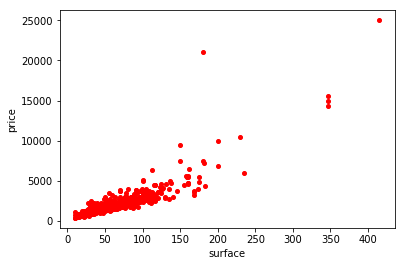

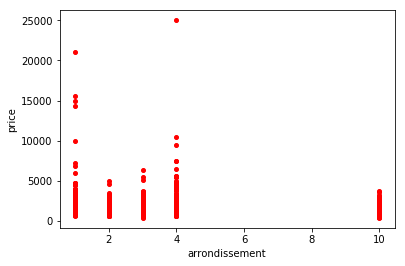

In [7]:
print("--------------------------------------------------------------")
print("Affichage des donnees:")
showGraphByXdataAndYtarget(dataset, data1Name, targetDataName)
showGraphByXdataAndYtarget(dataset, data2Name, targetDataName)

--------------------------------------------------------------
4 - Suppression des loyers superireur a 100000


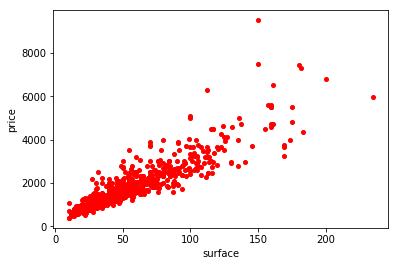

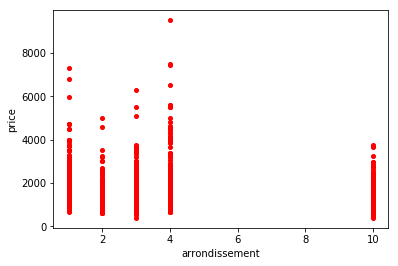

price             728
surface           728
arrondissement    728
dtype: int64


In [8]:
print("--------------------------------------------------------------")
print("4 - Suppression des loyers superireur a 100000")
dataset = dataset[dataset[targetDataName] < 10000]
showGraphByXdataAndYtarget(dataset, data1Name, targetDataName)
showGraphByXdataAndYtarget(dataset, data2Name, targetDataName)
print(dataset.count())

--------------------------------------------------------------
5 - Recherche du meilleur coefficient a appliquer sur l'algo KNeighborsClassifier


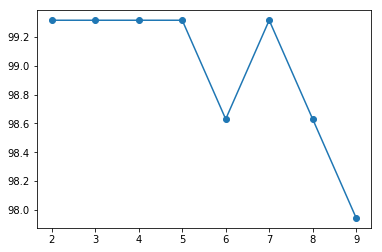

meilleur coefficient: 9


In [9]:
# data contient que les données d'entrées (surface et arrondissement)
data = datasetFilter(dataset, [data1Name, data2Name])

# target contient que les prix 
target = datasetFilter(dataset, targetDataName)

# repartition de 80% des donnes pour l'entrainement et 20% pour les tests
xtrain, xtest, ytrain, ytest = train_test_split(data, target, test_size=0.2, train_size=0.8)

print("--------------------------------------------------------------")
print("5 - Recherche du meilleur coefficient a appliquer sur l'algo KNeighborsClassifier")
kNeighbors = findKNeighborsClassifier(xtrain, xtest, ytrain, ytest)
print("meilleur coefficient: " + str(kNeighbors))

In [10]:
# entrainement du modele
knn = neighbors.KNeighborsClassifier(kNeighbors)
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

print("--------------------------------------------------------------")
print("6 - affichage des resultats des predictions")
for i in range(len(xtest)) :
    print("La prediction du loyer d'une surface de: " 
          + str(int(xtest.iloc[i][data1Name]))
          + "  dans l'arrondissement: "
          + str(int(xtest.iloc[i][data2Name]))
          + "  est de: "
          + str(predicted[i]))

--------------------------------------------------------------
6 - affichage des resultats des predictions
La prediction du loyer d'une surface de: 127  dans l'arrondissement: 4  est de: 2900
La prediction du loyer d'une surface de: 50  dans l'arrondissement: 10  est de: 1360
La prediction du loyer d'une surface de: 38  dans l'arrondissement: 2  est de: 1100
La prediction du loyer d'une surface de: 29  dans l'arrondissement: 3  est de: 900
La prediction du loyer d'une surface de: 112  dans l'arrondissement: 3  est de: 3200
La prediction du loyer d'une surface de: 20  dans l'arrondissement: 4  est de: 745
La prediction du loyer d'une surface de: 31  dans l'arrondissement: 4  est de: 1400
La prediction du loyer d'une surface de: 28  dans l'arrondissement: 10  est de: 684
La prediction du loyer d'une surface de: 51  dans l'arrondissement: 2  est de: 1850
La prediction du loyer d'une surface de: 21  dans l'arrondissement: 3  est de: 712
La prediction du loyer d'une surface de: 73  dans l'a